# __MA336 Artificial Intelligence Final Project: Diamond Pricing__

In this project we will be using neural networks and the diamond data set from [kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds) to investigate the relationship of diamond attributes and the types of architectures used to predict the price of these diamonds.

A neural netowrk is a type of computer algorithm that is inspired by the structure and function of the human brain. It consists of nodes that are interconnected and layered. Each neuron can communicate with neurons in other layers, processing information. Neural networks are designed to identify patterns and learn from past experiences, allowing them to make predictions based on user inputted data. They are extensively utilised in machine learning and deep learning applications, for example image and speech recognition, natural language processing and recommendation programs. Neural networks are trained with large datasets to enhance their accuracy and performance, which allows them to gain experience over time.

Neural networks are ideal for regression tasks due to their ability to capture complex non-linear relationships. They offer flexibility in model complexity and can handle various types of data. Furthermore they are capable of making accurate predictions on unseen data, making them versatile for a wide range of regression applications.

In this project, my goal is to train a neural network to predict the price of a diamond. I aim to write a program that recieves input data about a diamond and generates a suitable model to predict the diamonds prices, test the model and evaluate the findings.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from sklearn import preprocessing

# Diamond Data

The kaggle dataset consists of information on roughly 54,000 diamonds. As seen below it contains of both numerical and categorical variables.



In [ ]:
# Read and load the diamond dataset
diamonds_df = pd.read_csv('diamonds.csv')
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


There are 11 categories, as seen above, which are both numerical and categorical. The definition of each variable is given below:



*   Unnamed:0 - The diamond number, unique to the diamond,

*   Price - Price of the diamond in US dollars ($326 - 18,823),

*   Carat - The weight of the diamond (0.2 - 5.01),

*   Cut - The cut quality going from worst to best (Fair, Good, Very Good, Premium, Ideal),

*   Color - The color diamond colour, from J (worst) to D (best),

*   Clarity - A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)),

*   X - length in mm (0 - 10.74),

*   Y - width in mm (0 - 58.9),

*   Z - depth in mm (0 - 31.8),

*   Depth - The total depth percentage, given by the equation : z / mean(x, y) = 2 * z / (x + y) (43 - 79),

*   Table - The width of top of diamond relative to widest point (43 - 95).


In [ ]:
# Prints the column names in the dataset.
print(diamonds_df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


We can see from the code below that the dataset is complete and has no missing values. This allows us to easily process and work with the data.


In [ ]:
# Checking the dataset for NA values
naCount = []
for i in diamonds_df:
    naCount.append(diamonds_df[i].isnull().sum())
num = diamonds_df.count()
print(naCount/num*100)
# Shows that the dataset is complete and there is no missing data

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64


By converting the categorical variables into numerical variables we are able to use them in regression to determine the price of each diamonds. We can see below that each string has been replaced with a corresponding number.

In [ ]:
# Preprocess the data
df = diamonds_df.replace({'cut' : { 'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5 },
                'color' : { 'J' : 1, 'I' : 2, 'H' : 3, 'G' : 4, 'F' : 5, 'E' : 6, 'D' : 7 },
                'clarity' : { 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7, 'IF' : 8 }})

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


As we would like to predict the price of the diamonds, we need to seperate the price column from the rest of the data. Therefore we must define an X and Y variable to store the data. The X variable will be a subset of the diamond dataset which contains every variable except the price column (the features) and the Y variable will only contain the price column (the target).

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('price', axis=1)
Y = diamonds_df['price']

Splitting the data in to a training set and testing set is important as it allows users to evaluate a model. It enables the user to compare the preformance of different models. Furthermore, it allows the programmer to maintain the integrity of the data. Thus, ensuring the model is not trained and tested on the same data, which could lead to overfitting. We can see in the code below that the data is split in an 80-20 split. This means that the training set is comprised of 80% of the data and the test set is 20% of the data.

Scaling is a common practice in machine learning as it helps avoid numerical instability in machine learning. It enhances the models preformance, reduces the computational burden and improves the interpretability of the results. By scaling the features, we can reduce the computational complexity of the model, making the training process more efficient.

In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Methodology




We clear the session here so we know that any future models we train are starting from scratch and not starting from a previous run of data.

In [ ]:
# Clearing the data from any previous models
clear_session()

In this section of the code we are defining the architecture of the neural network. The "Units" refer to the number of nodes/neurons in that layer. We can see that each neuron is of type "Dense". This means that all neurons in the layer are densely connected, without skipping connections or any sparse connections. Each neuron is connected to each and every neuron of the previous layer. Dense layers are capable of learning complex patterns from the input data, making them versitile.

We can see that the activation for the nodes are "Relu". ReLU stands for Rectified Linear Unit and is a type of activation function used in artificial neural networks. It is one of the most commonly used activation functions and is defined as:

f(x) = max(0,x)

where X is the input to the activation function, and f(x) is the output. If the input value X is negative, the output would be 0, otherwise the output would be the value inputted, X.

In [ ]:
# Define the base neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In this part of the code we train the model and store it in the variable history. This model is trained on the X and Y training subsets, with a batch size of 32. This means that the model will be trained on the 80% subset of the diamond dataset split earlier on. The rest of the data will be used as the validation set. We can also see that the epoch number is 500, which means that the model will run through 500 iterations, storing each iteration in the history variable so we can analyse each runthrough.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
1349/1349 [==============================] - 5s 3ms/step - loss: 19261038.0000 - val_loss: 13418933.0000
Epoch 2/500
1349/1349 [==============================] - 4s 3ms/step - loss: 10484325.0000 - val_loss: 7334941.0000
Epoch 3/500
1349/1349 [==============================] - 5s 4ms/step - loss: 5752369.5000 - val_loss: 4539888.5000
Epoch 4/500
1349/1349 [==============================] - 4s 3ms/step - loss: 3470853.5000 - val_loss: 2513459.7500
Epoch 5/500
1349/1349 [==============================] - 4s 3ms/step - loss: 1901141.3750 - val_loss: 1406134.3750
Epoch 6/500
1349/1349 [==============================] - 5s 4ms/step - loss: 1220592.3750 - val_loss: 1091831.8750
Epoch 7/500
1349/1349 [==============================] - 4s 3ms/step - loss: 1046127.3125 - val_loss: 1008909.1250
Epoch 8/500
1349/1349 [==============================] - 4s 3ms/step - loss: 970079.5625 - val_loss: 943927.5000
Epoch 9/500
1349/1349 [==============================] - 5s 3ms/step - loss: 91

We can see from the graph below that 500 epochs is not nessecary and that the training and validation loss converge around 120-160 epochs. We can test this by plotting another graph to zoom in further and see that the graphs do converge between 120-160.

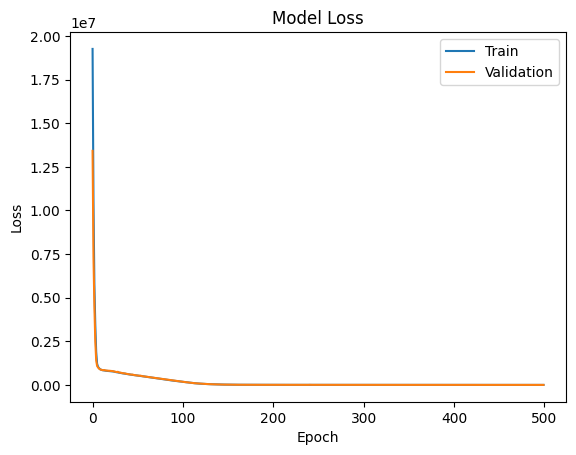

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

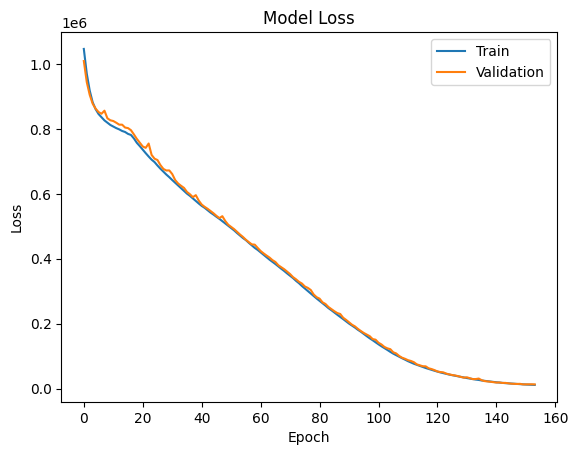

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'][6:160])
plt.plot(history.history['val_loss'][6:160])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/50
1349/1349 [==============================] - 5s 3ms/step - loss: 29131606.0000 - val_loss: 23579526.0000
Epoch 2/50
1349/1349 [==============================] - 4s 3ms/step - loss: 18386834.0000 - val_loss: 15648694.0000
Epoch 3/50
1349/1349 [==============================] - 3s 2ms/step - loss: 15252231.0000 - val_loss: 14802475.0000
Epoch 4/50
1349/1349 [==============================] - 4s 3ms/step - loss: 14412949.0000 - val_loss: 13927629.0000
Epoch 5/50
1349/1349 [==============================] - 5s 4ms/step - loss: 13455286.0000 - val_loss: 12874349.0000
Epoch 6/50
1349/1349 [==============================] - 4s 3ms/step - loss: 12280693.0000 - val_loss: 11565822.0000
Epoch 7/50
1349/1349 [==============================] - 4s 3ms/step - loss: 10813546.0000 - val_loss: 9947947.0000
Epoch 8/50
1349/1349 [==============================] - 5s 3ms/step - loss: 9096089.0000 - val_loss: 8213851.5000
Epoch 9/50
1349/1349 [==============================] - 5s 4ms/step - loss:

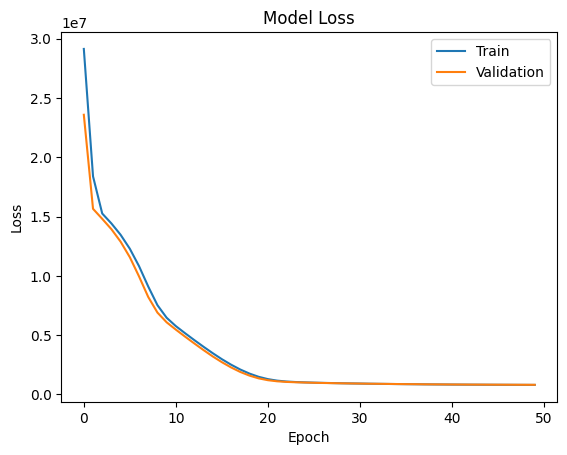

In [ ]:
# Model architecture 1
clear_session()
model1 = Sequential()
model1.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.compile(optimizer='adam', loss='mean_squared_error')
m1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Epoch 1/50
1349/1349 [==============================] - 6s 2ms/step - loss: 25523796.0000 - val_loss: 15803352.0000
Epoch 2/50
1349/1349 [==============================] - 4s 3ms/step - loss: 14981801.0000 - val_loss: 14211334.0000
Epoch 3/50
1349/1349 [==============================] - 3s 2ms/step - loss: 13386133.0000 - val_loss: 12361942.0000
Epoch 4/50
1349/1349 [==============================] - 3s 2ms/step - loss: 11014903.0000 - val_loss: 9375608.0000
Epoch 5/50
1349/1349 [==============================] - 3s 2ms/step - loss: 7760412.0000 - val_loss: 6456155.0000
Epoch 6/50
1349/1349 [==============================] - 4s 3ms/step - loss: 5776547.0000 - val_loss: 5216616.5000
Epoch 7/50
1349/1349 [==============================] - 3s 2ms/step - loss: 4635675.5000 - val_loss: 4090893.0000
Epoch 8/50
1349/1349 [==============================] - 3s 2ms/step - loss: 3571528.5000 - val_loss: 3064591.0000
Epoch 9/50
1349/1349 [==============================] - 3s 2ms/step - loss: 26053

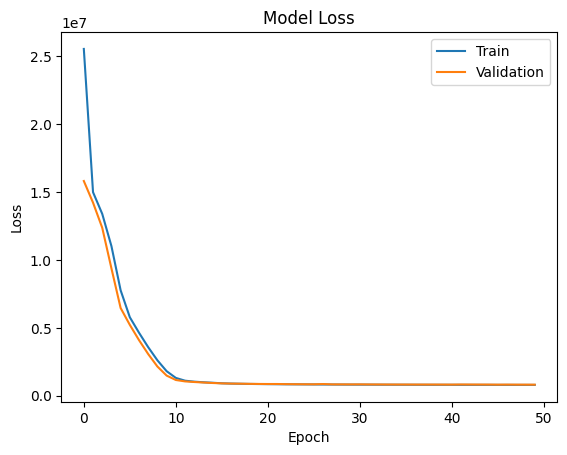

In [ ]:
# Model architecture 2
clear_session()
model2 = Sequential()
model2.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(2, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adam', loss='mean_squared_error')
m2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/150
1349/1349 [==============================] - 4s 2ms/step - loss: 31321124.0000 - val_loss: 30816564.0000
Epoch 2/150
1349/1349 [==============================] - 3s 2ms/step - loss: 30713882.0000 - val_loss: 29990928.0000
Epoch 3/150
1349/1349 [==============================] - 3s 2ms/step - loss: 29716364.0000 - val_loss: 28860640.0000
Epoch 4/150
1349/1349 [==============================] - 5s 4ms/step - loss: 28453338.0000 - val_loss: 27505596.0000
Epoch 5/150
1349/1349 [==============================] - 3s 3ms/step - loss: 27013288.0000 - val_loss: 26017090.0000
Epoch 6/150
1349/1349 [==============================] - 3s 2ms/step - loss: 25455580.0000 - val_loss: 24439010.0000
Epoch 7/150
1349/1349 [==============================] - 4s 3ms/step - loss: 23844292.0000 - val_loss: 22842066.0000
Epoch 8/150
1349/1349 [==============================] - 3s 2ms/step - loss: 22242874.0000 - val_loss: 21288882.0000
Epoch 9/150
1349/1349 [==============================] - 3s 2ms/

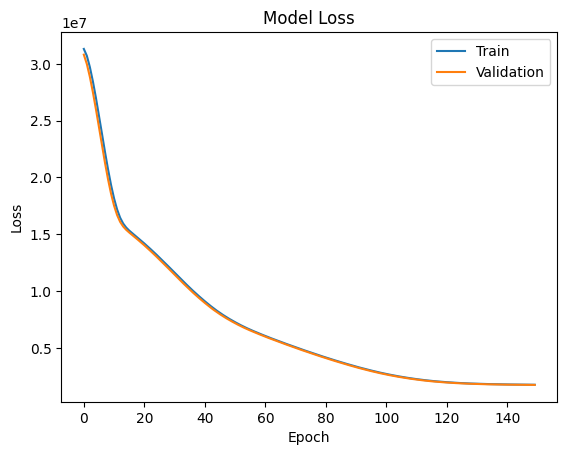

In [ ]:
# Model architecture 3
clear_session()
model3 = Sequential()
model3.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mean_squared_error')
m3 = model3.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(X_test, y_test))
plt.plot(m3.history['loss'])
plt.plot(m3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Comparison and Conclusions

As seen in the other architectures, changing the amount of nodes and the amount of layers can produce different outcomes in terms of training time and convergence rate. This can be due to many reasons, one being the model is comprised of too many nodes.

The base model (the first model discussed) has 3 neuron layers consisting of 64,32 and 1 nodes respectively. You can clearly see that this architecture is inefficient and overly complex as the convergence point is between 120 and 160 epochs, which means that it takes a longer amount of time to train this model.

```
# Base Model
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))
```
Furthermore, you can see that Architecture 3 is also inefficient as it has not enough nodes, which leads to the training time to also be extended. We can see that this model is comprised of two layers, one with 5 nodes and the other with 1 node. Looking at the graph where model 3 is, we can see that the convergence point is between 120 and 150 epochs again, meaning that an overly simple model will also lead to training times to be extended.

```
# Model 3
model3.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mean_squared_error')

```

Model architecture 1 and 2 tell a different story. If we look at model 1, we can see that there are only three neural layers with 10, 5 and 1 neurons respectively. The convergence point is between 20 and 30 epochs, which means the model will be able to be trained quickly, saving machine resources and being more efficient than the rest of the models discussed.

```
# Model 1
model1.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(1, activation='linear'))
```

Finally, model architecture 2 consists of a model that consists of 4 layers that have 5,5,2 and 1 neurons respectively. This architecture produced the fastest convergence point between 10 and 20 epochs, making it the most efficient model out of all the models tested. It also makes it the quickest model to train.

```
# Model 2
model2.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(2, activation='relu'))
model2.add(Dense(1, activation='linear'))
```

We can see through the various models there are many different architectures that can be used to predict the price of a diamond, some can be overly complex and some can be simple. In the case of artificial neural networks, adding more neurons does not nessecarily mean that the model will be better. Im many cases, overly complex models can increases machine resources and training times. Furthermore, making overly simple models can also be detrimential as it can increase training times and machine resources.

To conclude, we see that model 2 is the best architecture as it reaches the convergence point within 10-15 epochs, which is the quickest of all models tested. We can also see that this model requires the least amount of machine resources.